In [1]:
from author_style.utils import *

In [2]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import unidecode
#import spacy
import numpy as np
import pandas as pd

In [114]:
clean_texts_large()

In [23]:
seq_len = 512

df = csv_to_dataframes(output='c', MAX_LEN=seq_len)

In [24]:
pd.options.display.max_rows = 5
pd.options.display.max_seq_items = None
pd.options.display.max_colwidth = 4000
df

,text,author,title,book_date
0,"— Il paraît qu’il collectionne des cartes postales et des timbres-poste et des photos de gens qu’il n’a même pas connus. Je ne sais pas s’il a gardé une photo de moi. Autrefois, il en avait des tas et des tas. Il me découpait même dans le journal et puis il me collait dans un album. Une fois, j’ai eu droit à toute une page dans Pour vous. Il a acheté cent numéros. Il a dû jeter tout ça dehors, à présent. Je n’ai jamais vu un homme aussi rancunier. Évidemment, il était fou de moi, et alors il a dû détruire tous les souvenirs pour ne pas se rappeler. Tu sais, quand on s’est vus pour la dernière fois et qu’il m’a donné l’adresse de la cave où il s’est retiré pour que je vienne le voir, il tenait ma main dans la sienne et tout ce qu’il pouvait répéter, c’était Cora, Cora, Cora. J’ai fait une bêtise, j’aurais dû aller le voir, mais qu’est-ce que tu veux, quand j’ai rencontré Maurice, ça a été le coup de foudre, j’ai perdu la tête. Je ne suis pas le genre qui calcule et qui pense à l’avenir. Si j’avais été maligne, je serais allée le voir deux ou trois fois, juste pour le cas où les Allemands perdraient la guerre. Mais c’est pas mon genre. C’était le moment où j’avais le plus de succès, je chantais partout, j’étais très demandée. Mais il n’y avait que Maurice qui comptait, et rien d’autre. Un jour, il y a un garçon de café qui est venu me dire vous devriez faire attention, mademoiselle Cora, Maurice est un homme très dangereux. Vous aurez des ennuis, après. C’est tout ce qu’il m’a dit et puis il a eu des ennuis lui-même, la Gestapo l’a ramassé. Je me suis un peu renseignée, et c’est là que j’ai appris que Maurice travaillait pour la Gestapo. Mais c’était déjà trop tard, je l’aimais. Les gens ne comprennent jamais qu’on puisse aimer quelqu’un qui ne vous mérite pas. Moi non plus je ne comprends pas maintenant comment j’ai pu l’aimer. Seulement, en amour, il n’y a rien à comprendre, c’est comme ça, on n’y peut rien. C’est pas un truc où on peut faire ses comptes. C’est la plus belle connerie que j’ai faite dans ma vie mais je n’ai jamais été calculatrice. Je vivais comme si c’était une chanson. Et puis, quand on est jeune, on ne s’imagine pas qu’un jour on va être vieux. C’est trop loin, ça dépasse l’imagination. Une fois, je suis passée aux Champs-Élysées à côté de l’immeuble où monsieur Salomon était dans sa cave et j’ai eu du remords. Je me souviens très bien, j’ai même tout de suite traversé. Si tu m’avais dit à l’époque que j’allais avoir soixante-cinq ans et monsieur Salomon quatre-vingt-quatre, je t’aurais ri au nez. Évidemment, j’aurais pu venir le voir, la nuit, lui apporter du champagne et du foie gras, lui demander comment ça allait et s’il avait le moral. J’y ai pensé. Mais tu sais quoi ? Je",GARY Romain,L_angoisse Du Roi Salomon,1979
1,"crois que c’est maintenant seulement que je l’aime vraiment. Avant la guerre, il me couvrait de cadeaux, il était encore jeune, il me flattait, j’aimais aller dans des endroits avec lui, mais ce n’était pas le vrai sentiment. Alors tu comprends que quand j’ai rencontré Maurice et quand ça a été le vrai sentiment, la folie, la passion, quoi, monsieur Salomon, c’était comme s’il n’avait jamais existé. J’avais eu d’autres amants, tu sais. J’étais un peu folle de moi-même quand j’étais jeune. Je me souviens que ce qui me gênait le plus pendant l’occupation, quand je n’allais pas le voir dans sa cave, c’était qu’il était juif. Tu comprends bien que ce n’était pas du tout parce qu’il était juif. Ça m’était bien égal. C’est comme pour Maurice, ça m’était bien égal qu’il était pour les nazis. Un homme est un homme on aime ou on n’aime pas. J’étais trop jeune, je n’ai pas su apprécier monsieur Salomon à sa juste valeur. Il faut la maturité. Mais c’est trop tard. C’est ce qu’il y a de plus bête avec la maturité, ça vient toujours trop tard. Et tu veux que je te dise ? Monsieur Salomon, il n’a pas encore la maturité. Sans ça il y a longtemps qu’il m’aurait demandé de v

In [25]:
data = df[["text","author"]]

In [26]:
data.shape

(249, 2)

In [27]:
data["taille"] = data.text.apply(lambda x : len(x.split(" ")))
data.head(2)

/var/folders/t8/clhcfp2n5sgcs4b81syf8xym0000gp/T/ipykernel_28916/3158990497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["taille"] = data.text.apply(lambda x : len(x.split(" ")))


,text,author,taille
0,"— Il paraît qu’il collectionne des cartes postales et des timbres-poste et des photos de gens qu’il n’a même pas connus. Je ne sais pas s’il a gardé une photo de moi. Autrefois, il en avait des tas et des tas. Il me découpait même dans le journal et puis il me collait dans un album. Une fois, j’ai eu droit à toute une page dans Pour vous. Il a acheté cent numéros. Il a dû jeter tout ça dehors, à présent. Je n’ai jamais vu un homme aussi rancunier. Évidemment, il était fou de moi, et alors il a dû détruire tous les souvenirs pour ne pas se rappeler. Tu sais, quand on s’est vus pour la dernière fois et qu’il m’a donné l’adresse de la cave où il s’est retiré pour que je vienne le voir, il tenait ma main dans la sienne et tout ce qu’il pouvait répéter, c’était Cora, Cora, Cora. J’ai fait une bêtise, j’aurais dû aller le voir, mais qu’est-ce que tu veux, quand j’ai rencontré Maurice, ça a été le coup de foudre, j’ai perdu la tête. Je ne suis pas le genre qui calcule et qui pense à l’avenir. Si j’avais été maligne, je serais allée le voir deux ou trois fois, juste pour le cas où les Allemands perdraient la guerre. Mais c’est pas mon genre. C’était le moment où j’avais le plus de succès, je chantais partout, j’étais très demandée. Mais il n’y avait que Maurice qui comptait, et rien d’autre. Un jour, il y a un garçon de café qui est venu me dire vous devriez faire attention, mademoiselle Cora, Maurice est un homme très dangereux. Vous aurez des ennuis, après. C’est tout ce qu’il m’a dit et puis il a eu des ennuis lui-même, la Gestapo l’a ramassé. Je me suis un peu renseignée, et c’est là que j’ai appris que Maurice travaillait pour la Gestapo. Mais c’était déjà trop tard, je l’aimais. Les gens ne comprennent jamais qu’on puisse aimer quelqu’un qui ne vous mérite pas. Moi non plus je ne comprends pas maintenant comment j’ai pu l’aimer. Seulement, en amour, il n’y a rien à comprendre, c’est comme ça, on n’y peut rien. C’est pas un truc où on peut faire ses comptes. C’est la plus belle connerie que j’ai faite dans ma vie mais je n’ai jamais été calculatrice. Je vivais comme si c’était une chanson. Et puis, quand on est jeune, on ne s’imagine pas qu’un jour on va être vieux. C’est trop loin, ça dépasse l’imagination. Une fois, je suis passée aux Champs-Élysées à côté de l’immeuble où monsieur Salomon était dans sa cave et j’ai eu du remords. Je me souviens très bien, j’ai même tout de suite traversé. Si tu m’avais dit à l’époque que j’allais avoir soixante-cinq ans et monsieur Salomon quatre-vingt-quatre, je t’aurais ri au nez. Évidemment, j’aurais pu venir le voir, la nuit, lui apporter du champagne et du foie gras, lui demander comment ça allait et s’il avait le moral. J’y ai pensé. Mais tu sais quoi ? Je",GARY Romain,512
1,"crois que c’est maintenant seulement que je l’aime vraiment. Avant la guerre, il me couvrait de cadeaux, il était encore jeune, il me flattait, j’aimais aller dans des endroits avec lui, mais ce n’était pas le vrai sentiment. Alors tu comprends que quand j’ai rencontré Maurice et quand ça a été le vrai sentiment, la folie, la passion, quoi, monsieur Salomon, c’était comme s’il n’avait jamais existé. J’avais eu d’autres amants, tu sais. J’étais un peu folle de moi-même quand j’étais jeune. Je me souviens que ce qui me gênait le plus pendant l’occupation, quand je n’allais pas le voir dans sa cave, c’était qu’il était juif. Tu comprends bien que ce n’était pas du tout parce qu’il était juif. Ça m’était bien égal. C’est comme pour Maurice, ça m’était bien égal qu’il était pour les nazis. Un homme est un homme on aime ou on n’aime pas. J’étais trop jeune, je n’ai pas su apprécier monsieur Salomon à sa juste valeur. Il faut la maturité. Mais c’est trop tard. C’est ce qu’il y a de plus bête avec la maturité, ça vient toujours trop tard. Et tu veux que je te dise ? Monsieur Salomon, il n’a pas encore la maturité. Sans ça il y a longtemps qu’il m’aurait demandé de vivre avec lui. Il est aussi vieux qu

In [28]:
data.taille.value_counts().sort_index()

309      1
399      1
512    247
Name: taille, dtype: int64

In [29]:
len(data[data.taille >= 512]), len(data), len(data[data.taille < 512])

(247, 249, 2)

In [30]:
data_lim = data[data.taille==seq_len]
data_lim.shape

(247, 3)

In [31]:
#data[data.taille >= 512].value_counts().plot(kind="bar");

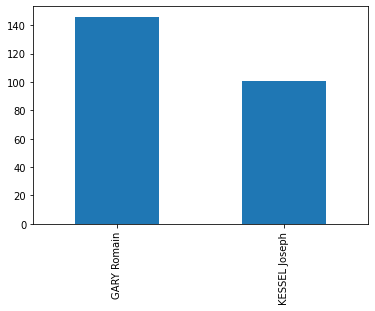

In [32]:
data_lim.author.value_counts().plot(kind="bar");

In [33]:
car = pd.DataFrame(data_lim.author.value_counts())

In [34]:
car

,author
GARY Romain,146
KESSEL Joseph,101


In [35]:
#define variables
min_lines = data_lim.author.value_counts().min()
last_author = data_lim.author.value_counts().index[-1]
author_without_last = data_lim.author.value_counts().index[:-1].to_list()

In [36]:
author_without_last 

['GARY Romain']

In [37]:
#Downsample majority classPython
# Separate majority and minority classes

df_minority = data_lim[data_lim.author==last_author]
df_minority

,text,author,taille
147,"« J’ai un souvenir… Il faut que je vous le raconte… Un souvenir du temps où je ne connaissais pas encore les terreurs contre quoi je ne puis rien. J’accompagnais toujours John… Et j’aimais cela… Un jour, nous étions de ce côté (Sybil pointait un doigt vers l’horizon à l’est de la grande montagne), sur une piste qui traversait une savane et s’arrêtait à une forêt profonde d’un vert très foncé, presque noir. Derrière, on voyait très bien le Kilimandjaro. C’est là, juste à la limite de la brousse et de la forêt, que nous les avons aperçus : l’éléphant et le rhinocéros. Ils se tenaient face à face, l’un contre l’autre, corne contre trompe. Ils s’étaient rencontrés au sortir des arbres sur le même sentier, et aucun ne voulait céder le passage. John m’a dit que c’était toujours ainsi. Vous comprenez : les deux monstres les plus puissants de la nature… L’orgueil… Ils se sont battus à mort sous nos yeux. Le fond du combat était ce mur de verdure sombre et, plus loin, la montagne. L’éléphant a eu le dessus – comme toujours, dit John. Il a fini par renverser le rhino d’un coup d’épaule – quel coup et quelle épaule ! – et par le piétiner. Mais les entrailles lui sortaient du ventre. John a dû le faire abattre peu après… Eh bien, j’aurais voulu que ce combat dure sans fin. C’était toute la force et la férocité du monde. Le commencement et la fin des temps. Et moi, je n’étais plus une femme quelconque, chétive, craintive. J’étais tout cela… » [sep] Mais les moranes, eux, s’élançaient à la rencontre de l’énorme fauve, projeté sur eux par toute sa fureur et toute sa puissance. Leurs cris de guerre étaient tellement stridents que les rugissements ne parvenaient pas à les couvrir. Leur cercle était devenu si réduit que, pour retrouver l’espace libre, le lion avait à rompre, abattre, ravager, lacérer un maillon de cet anneau si friable d’os et de muscles humains. Le morane qui se trouvait sur la trajectoire meurtrière, celui qui recevait contre son bouclier la force et la rage du choc s’écroulait aussitôt. Mais ni les crocs ni les griffes n’atteignaient son courage. Il s’agrippait au fauve. Et déjà tous les autres guerriers étaient sur la bête, enfonçaient leurs lances entre ses côtes, dans sa gueule et la frappaient à coups redoublés de leurs coutelas. Un, deux, trois moranes roulaient égorgés, éventrés, l’épaule, la nuque, l’échine rompues. Mais ils ne souffraient pas. Leur transe les rendait insensibles. Ils revenaient à l’assaut. Ils aidaient les autres. Et il en restait toujours assez pour terminer cette chasse frénétique, incroyable, pour massacrer, hacher le fauve. Les survivants revenaient alors à la manyatta, leur peau noire teinte de leur propre sang et du sang du lion et, à la pointe de leurs lances, ils faisaient flotter la crinière. [sep] La suite vint aisément. Il s’agissait de la poursuite d’une tribu de lions mangeurs d’hommes, d’une ruse et férocité diaboliques. Bullit contait bien et avec simplicité. De plus, son récit était nourri",KESSEL Joseph,512
148,"d’une vibration particulière : s’il s’adressait à moi, il parlait en vérité pour Sybil. D’abord elle fut, en bonne maîtresse de maison, préoccupée de l’impression que me faisait le récit. Mais son attention se détourna vite de moi. Ses mains, ses traits se calmèrent. Son regard prit cette lumineuse innocence qui le rendait plus beau. Ce n’était pas Bullit distrayant l’hôte d’un soir que Sybil entendait et voyait. Mais Bullit tel qu’il avait été dix années auparavant, plus léger de corps, plus mince et ardent de visage, sans raucité dans la voix, sans fibrilles rouges dans les yeux. Bullit tel qu’elle l’avait connu pour la première fois, colosse timide, qui portait sur lui l’odeur de la brousse et l’auréole de ses dangers, Bullit dans sa pleine gloire de chasseur blanc. Et lui, il disait son histoire pour une jeune fille arrivée d’Europe, limpide, exaltée, joyeuse, qui, sur la véranda fleurie de l’hôtel Norfolk ou au bar du Stanley ou dans les salons d

In [38]:
from sklearn.utils import resample 

#Downsample majority classPython

#df_downsampled=pd.DataFrame(columns=['text','author','title','book_date'])
df_all = []

for _ in author_without_last:
    df_majority = data_lim[data_lim.author==_]


    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,    # sample without replacement
                                     n_samples=min_lines,     # to match minority class
                                     random_state=123) # reproducible results
    
    df_all.append(df_majority_downsampled)

# Combine minority class with downsampled majority class
df_all.append(df_minority)
df_downsampled = pd.concat(df_all, ignore_index= True, axis=0)    

In [39]:
df_downsampled.author.value_counts()

GARY Romain      101
KESSEL Joseph    101
Name: author, dtype: int64

In [40]:
df_downsampled

,text,author,taille
0,"salle d’attente et j’ai frappé à la porte de monsieur Salomon. Il était vêtu avec sa dernière élégance et donnait une interview à un journaliste qui s’intéressait. [sep] Quand Chuck est parti, j’ai cherché dans le dictionnaire. J’ai trouvé que l’autre roi Salomon était le successeur de David, qui construisit des forteresses, équipa son armée de chars et s’assura des alliances, mais qu’il est mort quand même et est devenu rien et personne. Le petit Larousse disait que sa sagesse était restée légendaire dans tout l’Orient et dans l’Ancien Testament. Il était aussi connu pour ses fastes et c’est là qu’il ressemblait encore à monsieur Salomon, qui faisait pleuvoir ses largesses, lui aussi. Je pensais à cela parfois en allant porter de sa part des cadeaux à quelqu’un qui n’attendait plus rien. Il y en avait qui étaient tellement habitués à être oubliés que lorsqu’on déposait à leur porte des dons anonymes, ils croyaient que c’était tombé du ciel et qu’il y avait Quelqu’un qui s’était souvenu d’eux, là-haut. Moi je ne trouve pas que c’est de la volonté de puissance et de la folie des grandeurs mais peut-être que Chuck a raison lorsqu’il dit que c’est chez monsieur Salomon une façon polie de critiquer le ciel et de lui causer des remords. [sep] — Eh bien, justement, c’est la réponse qu’il faut… Allô, Nicolas ? Écoute-moi, Nicolas, c’est pas une question d’arithmétique. Tu as quel âge ? Dix-sept ans ? Alors tu dois comprendre que lorsqu’on dit qu’ils sont quatre milliards, ça veut dire que c’est toi qui es quatre milliards. C’est comme s’il y avait quatre milliards de plus de toi-même. Ça te rend important, non ? Tu comprends ? Tu n’es pas seul au monde, tu es quatre milliards. Tu te rends compte ? C’est formidable ! Ça change tout. Tu es français, tu es africain, tu es japonais… Tu es partout, mon vieux, tu es sur toute la terre ! Réfléchis à ça et rappelle-moi. Je serai là vendredi prochain de dix-sept heures à minuit. Je m’appelle Jérôme. Il faut réapprendre à compter, Nicolas. Tu as dix-sept ans, tu dois connaître les maths nouvelles. Seul au monde, c’est des maths anciennes. Tu as l’impression que tu ne comptes pas parce que tu ne sais pas compter. N’oublie pas de me rappeler, Nicolas. J’attends ton coup de téléphone. Je l’attends, ne m’oublie pas, Nicolas. Je compte sur toi, souviens-toi. [sep] J’étais donc assis là et je devais faire une drôle de tête, parce que monsieur Salomon s’est mis à rire, il voyait bien que je n’étais pas croyant, alors il a sorti son carnet de chèques et il m’en a signé un d’une brique et demie sans hésiter, comme si c’était la moindre des choses. Un homme que je ne connaissais ni d’Eve ni d’Adam une demi-heure auparavant. Là alors j’en ai eu les genoux qui se sont mis à trembler, parce que si des inconnus se mettent à vous signer des chèques d’une brique et demie, n’importe quoi peut vous arriver, et c’est l’angoisse. J’étais même devenu tout",GARY Romain,512
1,"au moins qu’elle profite avant. [sep] — Non, ça ira, monsieur Salomon. J’ai ce qu’il faut. Ça l’amusera de danser un peu, même si ce ne sont plus les mêmes danses que de son temps, quand c’était le charleston et le shimmy. J’ai vu ça dans les films muets. [sep] J’ai quand même pris quelques gnons parce qu’il avait un copain qui nous venait du Maghreb et ça m’a gêné pour cogner, je ne suis pas raciste. En France, on ne doit taper que sur des Français, si on veut être correct. [sep] — Je suis là, fit la voix de monsieur Salomon, et avec la nuit elle était encore plus profonde. Je me porte bien, je suis là, je ne suis pas encore mort, quoi qu’on en dise. Vous êtes un grand angoissé, mon jeune ami. [sep] — Afin d’encourager les personnes âgées à acquérir une attitude entreprenante dans une nouvelle étape de l’existence ! gueula brusquement monsieur Salomon et c’est seulement lorsqu’il ajouta, en brandissant le poing : [sep] — Il ne faut surtout pas être impatient, Jeannot. Ça risque de prendre du temps. Il faut un peu de cha

In [43]:
my_data_text = df_downsampled["text"].to_numpy()
my_data_author = df_downsampled["author"].to_numpy()

In [44]:
import joblib

joblib.dump(my_data_text,f"X_test_{seq_len}.pkl")
joblib.dump(my_data_author,f"y_test_{seq_len}.pkl")

['y_test_512.pkl']

In [ ]:
def dict_proba(pred):
  
  list_dicts = []
  authors = cat_transformer.classes_ #label encoder

  for probas in pred:
    i = 0
    dict = {}
    for proba in probas:
      dict[authors[i]] = round(proba,4)
      i = i+1
    list_dicts.append(dict)
  
  return list_dicts

In [81]:
proba = [1.8824009e-07, 3.3401844e-01, 5.0492155e-05, 3.3612199e-05, 7.3939465e-02,
 1.1347712e-01, 7.5885514e-04, 2.7993086e-01, 4.8975877e-02, 1.8440338e-04,
 2.5028788e-02, 4.6786014e-02, 2.0136466e-02 ,3.5923633e-05, 4.6142832e-05,
 9.3711233e-06, 1.8443435e-02, 8.6399080e-04, 3.6973104e-02, 3.0744291e-04]

[1.8824009e-07,
 9.3711233e-06,
 3.3612199e-05,
 3.5923633e-05,
 4.6142832e-05,
 5.0492155e-05,
 0.00018440338,
 0.00030744291,
 0.00075885514,
 0.0008639908,
 0.018443435,
 0.020136466,
 0.025028788,
 0.036973104,
 0.046786014,
 0.048975877,
 0.073939465,
 0.11347712,
 0.27993086,
 0.33401844]

In [86]:
sorted(proba)[0:3]

[1.8824009e-07, 9.3711233e-06, 3.3612199e-05]